In [1]:
%pylab inline
import os, sys, glob
import time
import numpy as np
import pickle
import json

import matplotlib as mpl
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load credential data 
from untappd_credentials import *

USER_NAME = 'ovarol'
#CLIENT_ID = "XXXXXXXXXXXXXX"
#CLIENT_SECRET = "XXXXXXXXXXXXXX"
#print 'Id:\t{}\nSecret:\t{}\n'.format(CLIENT_ID, CLIENT_SECRET)

In [3]:
# Using API from https://github.com/marshall91/pythonUntappd
import untappd_api as pythonUntappd

api = pythonUntappd.api(CLIENT_ID,CLIENT_SECRET)
userData = api.user_info(USER_NAME)['response']
print json.dumps(userData, indent=4)

{
    "user": {
        "last_name": "v.", 
        "uid": 2927509, 
        "untappd_url": "http://untappd.com/user/ovarol", 
        "account_type": "user", 
        "id": 2927509, 
        "recent_brews": {
            "count": 5, 
            "items": [
                {
                    "beer": {
                        "auth_rating": 3.25, 
                        "beer_description": "Tuborg Gold is brewed on pure lager malt and has an inviting aroma of fruit and grain with notes of fennel. It's an elegant beer with an excellent balance between a dry richness, a certain liveliness and a subtle hob character. Serve it with fish dishes and spicy recipes. Enjoy at 5-8 C. ", 
                        "bid": 7520, 
                        "beer_style": "Lager - Pale", 
                        "beer_name": "Tuborg Guld/Gold", 
                        "wish_list": false, 
                        "beer_abv": 5.6, 
                        "beer_label": "https://untappd.akamaized.net/sit

In [4]:
uniqueBeers = list()

count, keepCollect = 0, True
scanCount = 0
while keepCollect:
    resp = api.user_distinct_beers(USER_NAME, offset=count)['response']
    count += resp['beers']['count']
    uniqueBeers.extend(resp['beers']['items'])
    print 'Unique beers collected: {}'.format(len(uniqueBeers))
    scanCount += 1
    if resp['beers']['count'] <> 0:
        time.sleep(1)
    else:
        break

Unique beers collected: 25
Unique beers collected: 50
Unique beers collected: 75
Unique beers collected: 100
Unique beers collected: 107
Unique beers collected: 107


In [5]:
print json.dumps(uniqueBeers, indent=4, sort_keys=True)

[
    {
        "beer": {
            "auth_rating": 0, 
            "beer_abv": 5.6, 
            "beer_description": "Tuborg Gold is brewed on pure lager malt and has an inviting aroma of fruit and grain with notes of fennel. It's an elegant beer with an excellent balance between a dry richness, a certain liveliness and a subtle hob character. Serve it with fish dishes and spicy recipes. Enjoy at 5-8 C. ", 
            "beer_ibu": 0, 
            "beer_label": "https://untappd.akamaized.net/site/beer_logos/beer-TuborgGold_7520.jpeg", 
            "beer_name": "Tuborg Guld/Gold", 
            "beer_slug": "carlsberg-group-tuborg-guld-gold", 
            "beer_style": "Lager - Pale", 
            "bid": 7520, 
            "created_at": "Sat, 06 Nov 2010 06:36:28 +0000", 
            "rating_count": 12704, 
            "rating_score": 2.94, 
            "wish_list": false
        }, 
        "brewery": {
            "brewery_active": 1, 
            "brewery_id": 344, 
            "brew

In [24]:
# Check style counts
styleCounts = dict()
for b in uniqueBeers:
    if b['beer']['beer_style'] not in styleCounts:
        styleCounts[b['beer']['beer_style']] = 0
    styleCounts[b['beer']['beer_style']] += 1

for s in sorted(styleCounts, key=styleCounts.get, reverse=True):
    print s, styleCounts[s]

Porter - American 6
Stout - Milk / Sweet 6
IPA - American 5
Stout - American Imperial / Double 5
Scotch Ale / Wee Heavy 4
Pale Ale - American 4
Porter - Other 4
Stout - Russian Imperial 4
Rye Beer / Rye IPA 3
Stout - American 3
Stout - Imperial / Double 3
Dunkelweizen 3
Lager - Pale 3
Pale Wheat Ale - American 3
Witbier 2
Stout - Oatmeal 2
Altbier 2
Stout - Other 2
Kölsch 2
Brown Ale - American 2
Hefeweizen 2
Pilsner - Other 2
Stout - Irish Dry 2
Lager - Helles 2
Pale Ale - Belgian 2
Lager - Black 2
Pilsner - Czech 1
Lager - American Amber / Red 1
IPA - Session / India Session Ale 1
Kellerbier / Zwickelbier 1
IPA - Belgian 1
Red Ale - American Amber / Red 1
Stout - Oyster 1
Golden Ale 1
Kristallweizen  1
Barleywine - English 1
IPA - Imperial / Double 1
Flanders Red Ale 1
Barleywine - American 1
Red Ale - Irish 1
Lager - Dortmunder / Export 1
Strong Ale - American 1
Belgian Tripel 1
Fruit Beer 1
Red Ale - Imperial / Double 1
Herbed / Spiced Beer 1
Radler 1
Gose 1
Schwarzbier 1
IPA - Eng

In [27]:
# Most preferred brewery
breweryCount = dict()
for b in uniqueBeers:
    if b['brewery']['brewery_name'] not in breweryCount:
        breweryCount[b['brewery']['brewery_name']] = 0
    breweryCount[b['brewery']['brewery_name']] += 1

for s in sorted(breweryCount, key=breweryCount.get, reverse=True):
    print s, breweryCount[s]

Boston Beer Company (Samuel Adams) 8
Evil Czech Brewery 8
New Holland Brewing Company 6
Goshen Brewing Company 6
Bell's Brewery 5
Crooked Ewe Brewery 5
Anadolu Efes 4
Founders Brewing Co. 4
Upland Brewing Company 4
Lagunitas Brewing Company 3
Brauerei Beck 3
Goose Island Beer Co. 3
Stone Brewing 3
Kulmbacher Brauerei 2
Flat12 Bierwerks 2
Jacob Leinenkugel Brewing Company 2
Kona Brewing Company 2
Two Brothers Brewing Company 2
Erdinger Weissbräu 2
Charles Wells Brewery 2
Great Lakes Brewing Company 1
Adnams 1
Guinness 1
Binding Brauerei 1
Great Divide Brewing Company 1
Velké Březno 1
Tyskie Browary Książęce (Kompania Piwowarska) 1
Sierra Nevada Brewing Co. 1
Dogfish Head Craft Brewery 1
North Coast Brewing Company 1
Brauerei Aying  1
Brouwerij Rodenbach 1
Arcadia Brewing Company (Arcadia Ales) 1
Greenbush Brewing Company 1
Samuel Smith's Old Brewery 1
Resignation Brewery 1
Cölner Hofbräu Früh 1
Schlafly - The Saint Louis Brewery 1
Abita Brewing Company 1
Goodwood Brewing 1
Deschutes Bre

Avg. IBU: 29.6635514019
Avg. ABV: 6.45841121495


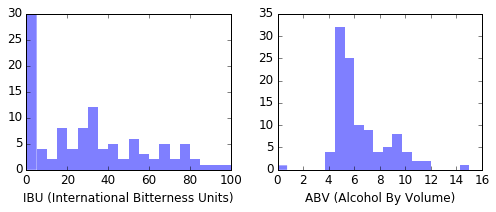

In [28]:
ibuList, abvList = list(), list()
for b in uniqueBeers:
    ibuList.append(b['beer']['beer_ibu'])
    abvList.append(b['beer']['beer_abv'])
    
print 'Avg. IBU: {}'.format(np.mean(ibuList))
print 'Avg. ABV: {}'.format(np.mean(abvList))

fig, axarr = plt.subplots(1, 2, figsize=(7,3))
axarr[0].hist(ibuList, bins=20, alpha=0.5, linewidth=0)
axarr[0].set_xlabel('IBU (International Bitterness Units)', fontsize=12)
axarr[0].tick_params(axis='both', which='major', labelsize=12)

axarr[1].hist(abvList, bins=20, alpha=0.5, linewidth=0)
axarr[1].set_xlabel('ABV (Alcohol By Volume)', fontsize=12)
axarr[1].tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()

2.0 4.75


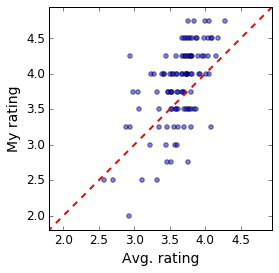

In [46]:
# Scatter plot of avg. ratings vs. my ratings
scatterData = list()
for b in uniqueBeers:
    scatterData.append((b['beer']['rating_score'], b['rating_score']))
scatterData = np.array(scatterData)    

fig = plt.figure(figsize=(4,4))
plt.plot([0,5],[0,5],'r--', linewidth=2)
plt.scatter(scatterData[:,0], scatterData[:,1], alpha=0.5)

minV, maxV = np.min(scatterData), np.max(scatterData)
print minV, maxV
plt.xlim((minV-0.2, maxV+0.2))
plt.ylim((minV-0.2, maxV+0.2))
plt.xlabel('Avg. rating', fontsize=14)
plt.ylabel('My rating', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)